# EDA: Russian Song Lyrics Dataset

Exploratory Data Analysis для датасета русских песен


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Загружаем данные
df = pd.read_csv('../data/russian_song_lyrics.csv')
print(f" Загружено {len(df):,} песен")
print(f" Колонки: {df.columns.tolist()}")

 Загружено 166,044 песен
 Колонки: ['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id', 'language_cld3', 'language_ft', 'language']


## 1. Общая статистика


In [17]:
print("=== Информация о датасете ===")
print(f"Всего песен: {len(df):,}")
print(f"Уникальных артистов: {df['artist'].nunique():,}")
print(f"Период: {df['year'].min():.0f} - {df['year'].max():.0f}")
print(f"\nПропущенные значения:")
print(df.isnull().sum())

=== Информация о датасете ===
Всего песен: 166,044
Уникальных артистов: 28,859
Период: 1 - 2024

Пропущенные значения:
title            3
tag              0
artist           0
year             0
views            0
features         0
lyrics           0
id               0
language_cld3    0
language_ft      0
language         0
dtype: int64


## 2. Распределение по жанрам


Топ жанров:
tag
rap        108711
pop         30331
rock        19238
rb           4964
misc         2566
country       234
Name: count, dtype: int64


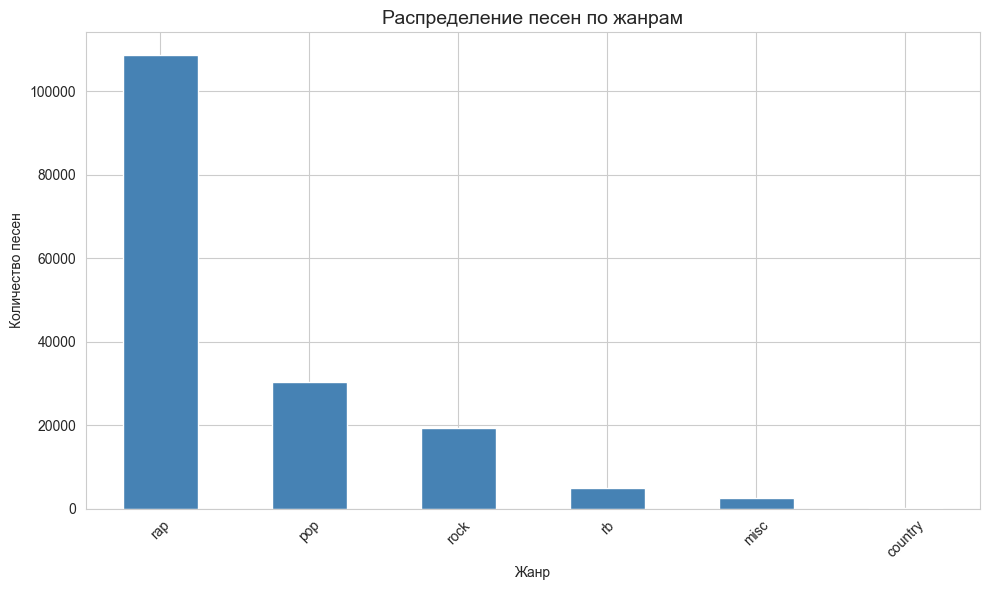


 Rap составляет 65.5% датасета


In [18]:
# Распределение жанров
genre_counts = df['tag'].value_counts()
print("Топ жанров:")
print(genre_counts)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='steelblue')
plt.title('Распределение песен по жанрам', fontsize=14)
plt.xlabel('Жанр')
plt.ylabel('Количество песен')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n Rap составляет {genre_counts['rap']/len(df)*100:.1f}% датасета")

## 3. Топ артисты (RAP)


 Рэп песен: 108,711

=== Топ 20 рэп-артистов ===
 1. Genius Russian Translations ( )          - 1882 песен
 2.   (dima bamberg)                         -  317 песен
 3.   (vishel pokurit)                       -  280 песен
 4. Noize MC                                 -  275 песен
 5.   (Slava KPSS)                           -  268 песен
 6.  (naitivihod)                            -  258 песен
 7.  (Zamay)                                 -  230 песен
 8.  (King SD)                               -  222 песен
 9.  (Dimdekt)                               -  221 песен
10. Johnyboy                                 -  219 песен
11.  (MEZZA)                                 -  217 песен
12. Loc-Dog                                  -  212 песен
13.  (Ezhemesyachnie)                        -  198 песен
14. i61                                      -  197 песен
15. Bad Balance                              -  196 песен
16. H1GH                                     -  192 песен
17.   (Rem Digga)      

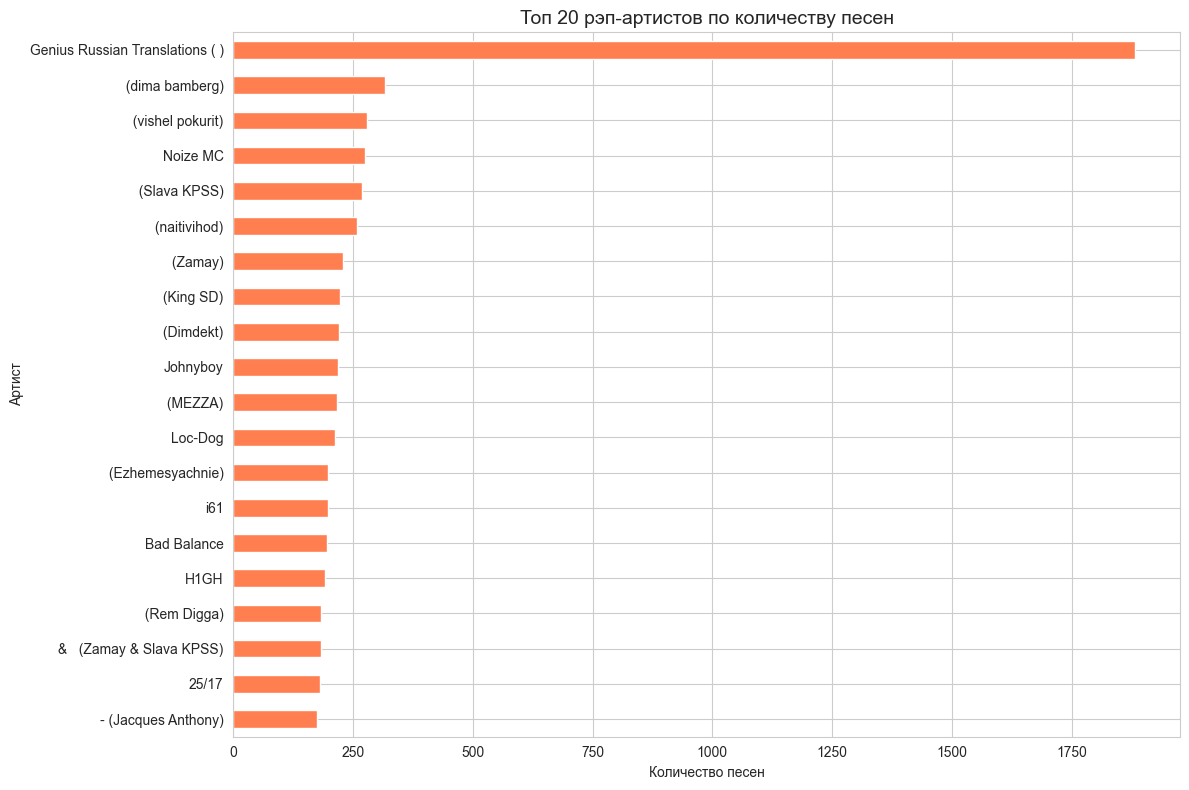

In [19]:
# Фильтруем только рэп
rap_df = df[df['tag'] == 'rap'].copy()
print(f" Рэп песен: {len(rap_df):,}")

# Топ артисты
top_artists = rap_df['artist'].value_counts().head(20)
print("\n=== Топ 20 рэп-артистов ===")
for i, (artist, count) in enumerate(top_artists.items(), 1):
    print(f"{i:2d}. {artist:40s} - {count:4d} песен")

plt.figure(figsize=(12, 8))
top_artists.plot(kind='barh', color='coral')
plt.title('Топ 20 рэп-артистов по количеству песен', fontsize=14)
plt.xlabel('Количество песен')
plt.ylabel('Артист')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 4. Проблемы с форматированием артистов


In [20]:
# Анализ проблем с именами
print("=== Проблемы форматирования ===")

# Артисты с лишними пробелами
artists_with_spaces = rap_df[rap_df['artist'].str.startswith(' ')]['artist'].unique()
print(f"\nАртисты с лишними пробелами: {len(artists_with_spaces)}")
print("Примеры:")
for artist in list(artists_with_spaces)[:10]:
    print(f'  "{artist}"')

# Артисты со скобками
artists_with_brackets = rap_df[rap_df['artist'].str.contains(r'\(.*\)', na=False)]['artist'].unique()
print(f"\nАртисты со скобками: {len(artists_with_brackets)}")
print("Примеры:")
for artist in list(artists_with_brackets)[:10]:
    print(f'  "{artist}"')

=== Проблемы форматирования ===

Артисты с лишними пробелами: 2211
Примеры:
  " (Ligalize)"
  "  (dima bamberg)"
  "  (Another MC)"
  " (Guf)"
  "  (Project Mutilation)"
  " (Luperkal)"
  " &   (Luperkal & Vadyara Blues)"
  "  (Andy Cartwright)"
  " (Timati)"
  " (Basta)"

Артисты со скобками: 3405
Примеры:
  " (Ligalize)"
  "  (dima bamberg)"
  "  (Another MC)"
  "Vs (Igemon Records)"
  " (Guf)"
  "Tony D (BGR)"
  "  (Project Mutilation)"
  " (Luperkal)"
  " &   (Luperkal & Vadyara Blues)"
  "  (Andy Cartwright)"


## 5. Целевые артисты для сбора аннотаций


In [21]:
# Известные русские рэп-артисты
target_artists_search = {
    'Oxxxymiron': ['Oxxxymiron', 'Oxxxy'],
    'FACE': ['FACE', 'Face'],
    'PHARAOH': ['PHARAOH', 'Pharaoh'],
    'Miyagi': ['Miyagi'],
    'Скриптонит': ['Scriptonite', 'Skryptonite'],
    'Баста': ['Basta', 'Баста'],
    'Гуф': ['Guf', 'Гуф'],
    'Noize MC': ['Noize MC'],
    'Каста': ['Kasta', 'Каста'],
    'Замай': ['Zamay', 'Замай'],
    'Слава КПСС': ['Slava KPSS'],
    'Элджей': ['Eldzhey', 'Элджей'],
    'Johnyboy': ['Johnyboy'],
}

print("=== Целевые артисты для сбора аннотаций ===")
target_stats = []

for artist_name, search_terms in target_artists_search.items():
    # Ищем по всем вариантам
    mask = rap_df['artist'].str.contains('|'.join(search_terms), case=False, na=False, regex=True)
    matches = rap_df[mask]

    if len(matches) > 0:
        actual_name = matches['artist'].value_counts().index[0]
        count = len(matches)
        target_stats.append({
            'artist': artist_name,
            'actual_name': actual_name,
            'songs': count
        })
        print(f" {artist_name:20s} - {count:4d} песен (как '{actual_name}')")

target_df = pd.DataFrame(target_stats)
print(f"\n Всего найдено {len(target_df)} целевых артистов")
print(f" Всего песен: {target_df['songs'].sum():,}")

=== Целевые артисты для сбора аннотаций ===
 Oxxxymiron           -  156 песен (как 'Oxxxymiron')
 FACE                 -  205 песен (как 'FACE')
 PHARAOH              -  197 песен (как 'PHARAOH')
 Miyagi               -  124 песен (как 'Miyagi &  (Endspiel)')
 Скриптонит           -  181 песен (как ' (Scriptonite)')
 Баста                -  288 песен (как ' (Basta)')
 Гуф                  -  139 песен (как ' (Guf)')
 Noize MC             -  275 песен (как 'Noize MC')
 Каста                -  137 песен (как ' (Kasta)')
 Замай                -  423 песен (как ' (Zamay)')
 Слава КПСС           -  482 песен (как '  (Slava KPSS)')
 Элджей               -  136 песен (как ' (Eldzhey)')
 Johnyboy             -  233 песен (как 'Johnyboy')

 Всего найдено 13 целевых артистов
 Всего песен: 2,976


## 6. Анализ текстов песен


=== Статистика по текстам ===
Средняя длина текста: 1621 символов
Среднее количество слов: 289 слов

Квартили длины (слова):
count    108711.000000
mean        289.398101
std         211.102995
min          10.000000
25%         189.000000
50%         264.000000
75%         355.000000
max       14386.000000
Name: lyrics_words, dtype: float64


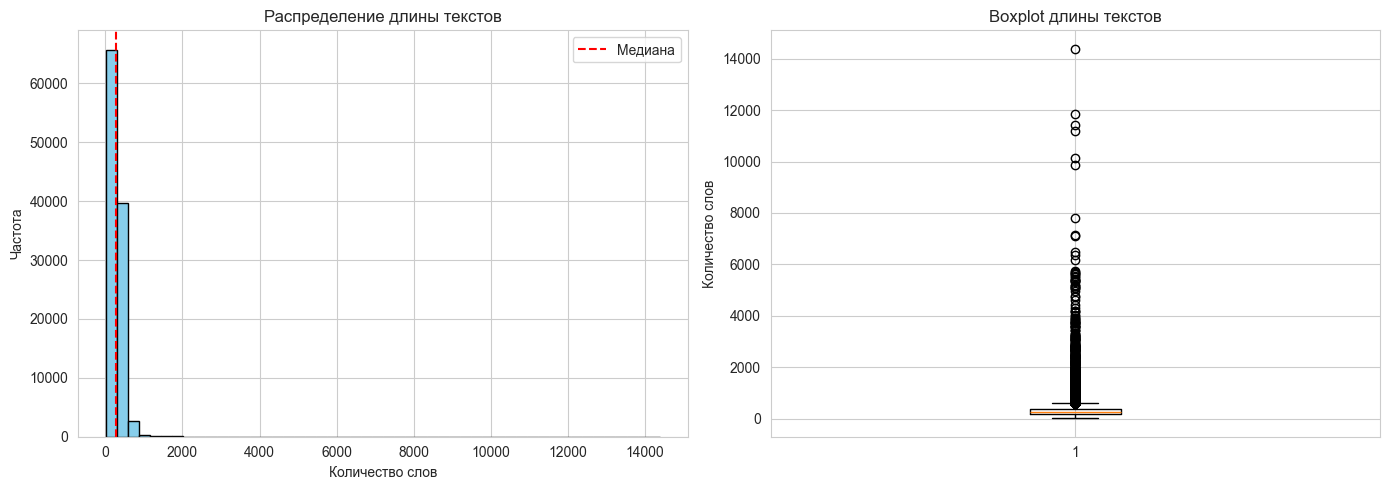

In [22]:
# Статистика по длине текстов
rap_df['lyrics_length'] = rap_df['lyrics'].fillna('').str.len()
rap_df['lyrics_words'] = rap_df['lyrics'].fillna('').str.split().str.len()

print("=== Статистика по текстам ===")
print(f"Средняя длина текста: {rap_df['lyrics_length'].mean():.0f} символов")
print(f"Среднее количество слов: {rap_df['lyrics_words'].mean():.0f} слов")
print(f"\nКвартили длины (слова):")
print(rap_df['lyrics_words'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Распределение длины
axes[0].hist(rap_df['lyrics_words'].dropna(), bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Количество слов')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение длины текстов')
axes[0].axvline(rap_df['lyrics_words'].median(), color='red', linestyle='--', label='Медиана')
axes[0].legend()

# Boxplot
axes[1].boxplot(rap_df['lyrics_words'].dropna())
axes[1].set_ylabel('Количество слов')
axes[1].set_title('Boxplot длины текстов')

plt.tight_layout()
plt.show()

## 7. Экспорт целевых артистов


In [23]:
# Сохраняем список целевых артистов для сборщика
target_df.to_json('../data/target_artists.json', orient='records', force_ascii=False, indent=2)
print(" Сохранено в data/target_artists.json")
print(f"\n Готово для сбора аннотаций с {len(target_df)} артистов")

 Сохранено в data/target_artists.json

 Готово для сбора аннотаций с 13 артистов


## 8. Пропуски и качество данных


Колонки с пропусками:
title    0.0%
dtype: object


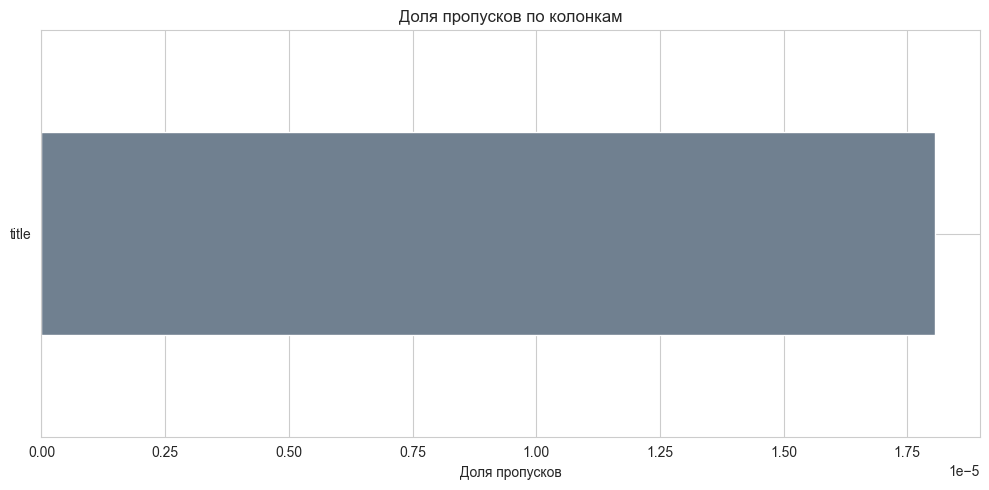

In [24]:
missing_ratio = df.isnull().mean().sort_values(ascending=False)
missing_ratio = missing_ratio[missing_ratio > 0]
print('Колонки с пропусками:')
print(missing_ratio.apply(lambda x: f'{x*100:.1f}%'))

if not missing_ratio.empty:
    plt.figure(figsize=(10, 5))
    missing_ratio.sort_values().plot(kind='barh', color='slategray')
    plt.title('Доля пропусков по колонкам')
    plt.xlabel('Доля пропусков')
    plt.tight_layout()
    plt.show()


## 9. Языки в датасете


=== language ===
language
ru    166044
Name: count, dtype: int64


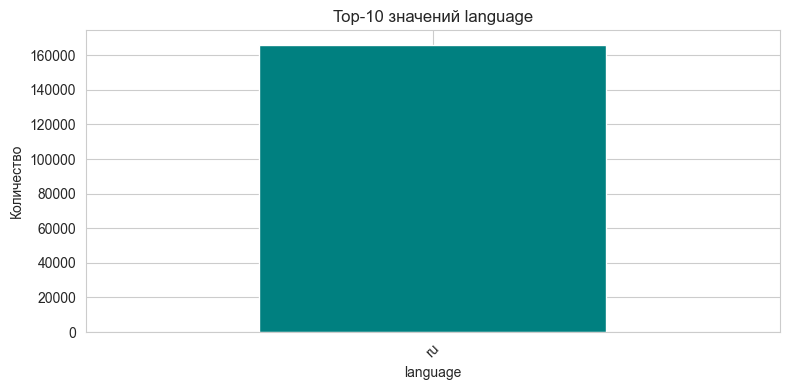

=== language_cld3 ===
language_cld3
ru    166044
Name: count, dtype: int64


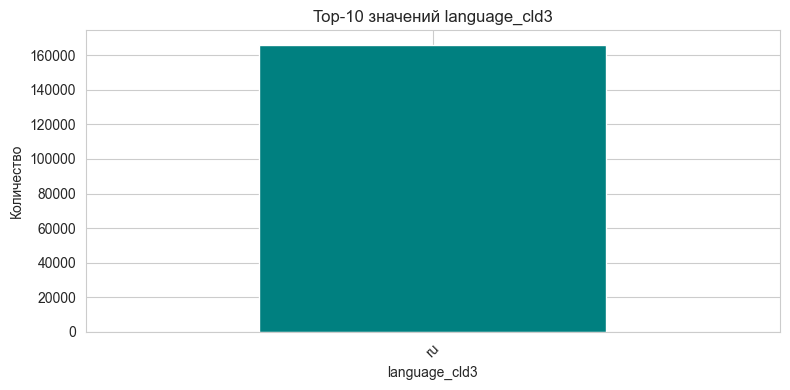

=== language_ft ===
language_ft
ru    166044
Name: count, dtype: int64


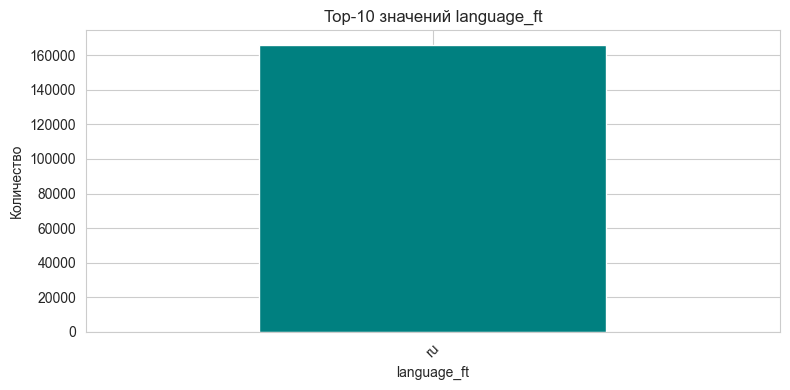

In [25]:
for col in ['language', 'language_cld3', 'language_ft']:
    if col in df.columns:
        print(f'=== {col} ===')
        print(df[col].value_counts().head(10))
        plt.figure(figsize=(8, 4))
        df[col].value_counts().head(10).plot(kind='bar', color='teal')
        plt.title(f'Top-10 значений {col}')
        plt.xlabel(col)
        plt.ylabel('Количество')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


## 10. Распределение по годам


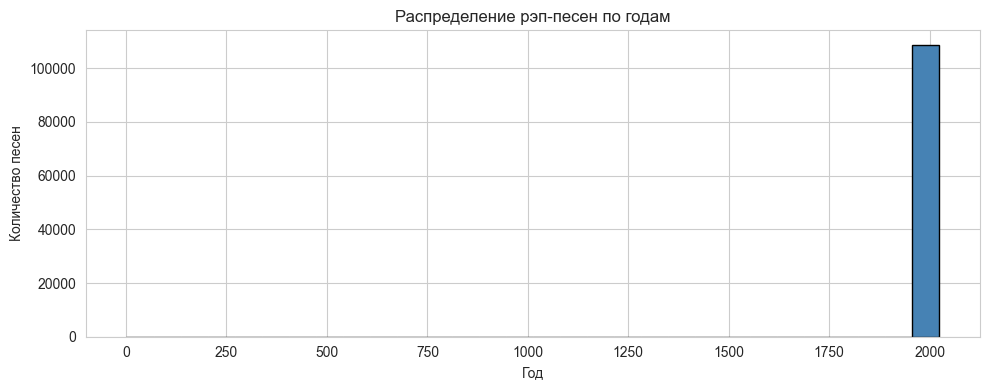

In [26]:
if 'year' in rap_df.columns:
    years = pd.to_numeric(rap_df['year'], errors='coerce').dropna().astype(int)
    if not years.empty:
        plt.figure(figsize=(10, 4))
        plt.hist(years, bins=30, color='steelblue', edgecolor='black')
        plt.title('Распределение рэп-песен по годам')
        plt.xlabel('Год')
        plt.ylabel('Количество песен')
        plt.tight_layout()
        plt.show()


## 11. Просмотры (views)


Просмотры (описательная статистика):
count    1.660440e+05
mean     3.374121e+03
std      2.805824e+04
min      0.000000e+00
25%      1.800000e+01
50%      6.700000e+01
75%      4.820000e+02
max      2.920314e+06
Name: views_num, dtype: float64


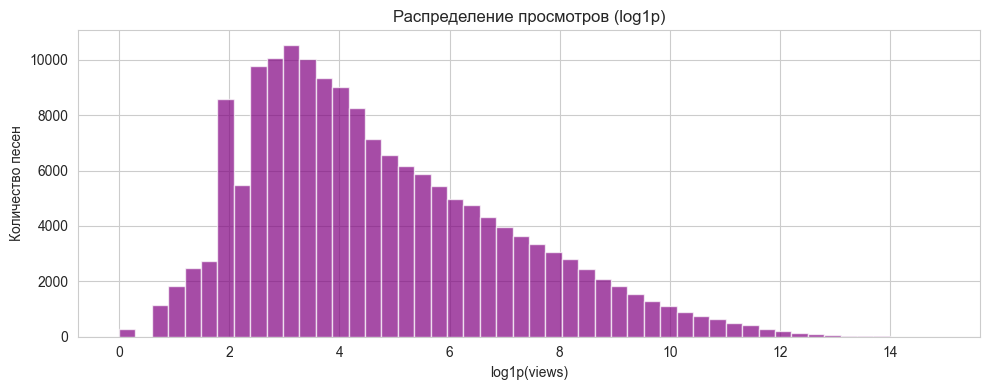

Топ-10 песен по просмотрам:
                                              artist                                  title  views_num
                                          GONE.Fludd                           МАМБЛ MUMBLE    2920314
                                       Versus Battle      12/04/15: Oxxxymiron vs. Johnyboy    2176702
                                       Big Baby Tape                         Gimme the Loot    2027881
                           MORGENSHTERN &  (Eldzhey)                               Cadillac    1966779
                                              SEEMEE                Голодный пёс Hungry dog    1918797
                                        MORGENSHTERN                          Cristal  МОЁТ    1801510
                                          Oxxxymiron Город под подошвой City Under the Sole    1705377
                                              Miyagi                                Captain    1628136
MORGENSHTERN, SODA LUV, blago white, OG Buda 

In [27]:
if 'views' in df.columns:
    df['views_num'] = pd.to_numeric(df['views'], errors='coerce')
    print('Просмотры (описательная статистика):')
    print(df['views_num'].describe())

    plt.figure(figsize=(10, 4))
    plt.hist(np.log1p(df['views_num'].dropna()), bins=50, color='purple', alpha=0.7)
    plt.title('Распределение просмотров (log1p)')
    plt.xlabel('log1p(views)')
    plt.ylabel('Количество песен')
    plt.tight_layout()
    plt.show()

    top_songs = df[['artist', 'title', 'views_num']].sort_values('views_num', ascending=False).head(10)
    print('Топ-10 песен по просмотрам:')
    print(top_songs.to_string(index=False))

    top_artists_views = df.groupby('artist')['views_num'].sum().sort_values(ascending=False).head(10)
    print('Топ-10 артистов по суммарным просмотрам:')
    print(top_artists_views)


## 12. Дубликаты


In [28]:
dups_artist_title = df.duplicated(subset=['artist', 'title']).sum()
dups_lyrics = df['lyrics'].fillna('').duplicated().sum()
print(f'Дубликаты (artist,title): {dups_artist_title:,}')
print(f'Дубликаты lyrics: {dups_lyrics:,}')

if dups_artist_title > 0:
    dup_rows = df[df.duplicated(subset=['artist', 'title'], keep=False)].head(10)
    print('Примеры дубликатов artist/title:')
    print(dup_rows[['artist', 'title', 'year']].to_string(index=False))


Дубликаты (artist,title): 0
Дубликаты lyrics: 524


## 13. Связь длины текста и просмотров


Корреляция views и длины текста (слова): 0.076


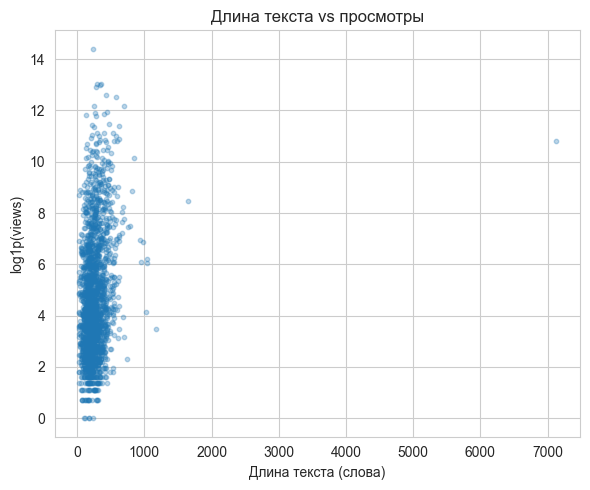

In [29]:
if 'views_num' in df.columns and 'lyrics' in df.columns:
    temp = df.copy()
    temp['lyrics_words'] = temp['lyrics'].fillna('').str.split().str.len()
    temp = temp.dropna(subset=['views_num'])
    if len(temp) > 0:
        corr = temp['views_num'].corr(temp['lyrics_words'])
        print(f'Корреляция views и длины текста (слова): {corr:.3f}')
        sample = temp.sample(n=min(2000, len(temp)), random_state=42)
        plt.figure(figsize=(6, 5))
        plt.scatter(sample['lyrics_words'], np.log1p(sample['views_num']), alpha=0.3, s=10)
        plt.xlabel('Длина текста (слова)')
        plt.ylabel('log1p(views)')
        plt.title('Длина текста vs просмотры')
        plt.tight_layout()
        plt.show()


## 14. Участники (features)


Топ фичерингов:
{}                                                   81994
{"Genius Russian Translations (Русский перевод)"}     3048
{"Аквариум (Aquarium)"}                                343
{"Михаил Шуфутинский (Mikhail Shufutinsky)"}           320
{"Филипп Киркоров (Philipp Kirkorov)"}                 308
{"дима бамберг (dima bamberg)"}                        293
{"вышел покурить (vishel pokurit)"}                    278
{"Гражданская оборона (Civil Defense)"}                277
{"Ирина Аллегрова (Irina Allegrova)"}                  249
{"Слава КПСС (Slava KPSS)"}                            243
{Noize MC}                                             242
{"Валерий Леонтьев (Valery Leontiev)"}                 235
{"найтивыход (naitivihod)"}                            224
{"Джизус (Dzhizus)"}                                   212
{"Лесоповал (Lesopoval)"}                              211
{"Стас Михайлов (Stas Mikhaylov)"}                     209
{"ДИМДЭКТ (Dimdekt)"}                   

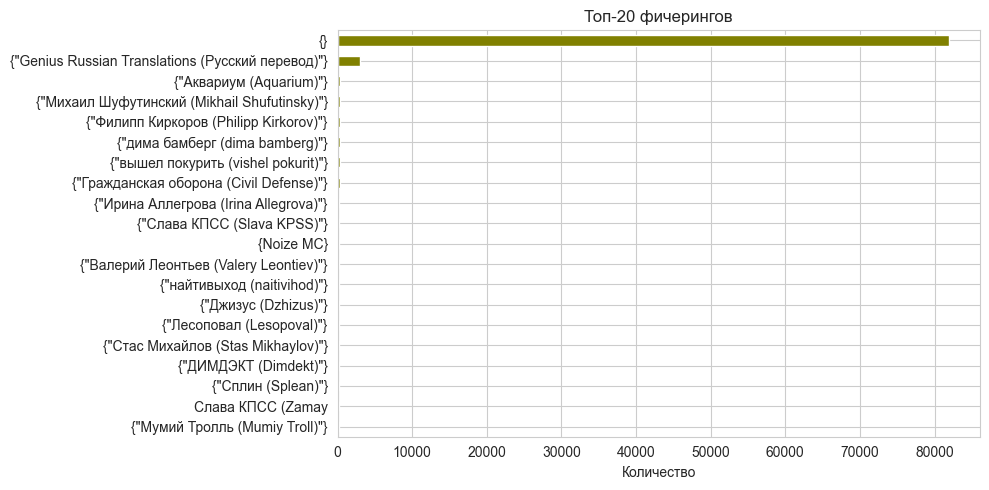

In [30]:
if 'features' in df.columns:
    feats = df['features'].fillna('')
    feats = feats[feats.str.len() > 0]
    if len(feats) > 0:
        all_feats = []
        for row in feats:
            parts = [p.strip() for p in re.split(r'[,&/;]\s*', str(row)) if p.strip()]
            all_feats.extend(parts)
        feat_counts = pd.Series(all_feats).value_counts().head(20)
        print('Топ фичерингов:')
        print(feat_counts)
        plt.figure(figsize=(10, 5))
        feat_counts[::-1].plot(kind='barh', color='olive')
        plt.title('Топ-20 фичерингов')
        plt.xlabel('Количество')
        plt.tight_layout()
        plt.show()


## 15. Аналитика аннотаций


Annotations dataset: ../data/annotations_dataset_new.json
Songs: 3291
Annotations: 22220
Avg annotations per song: 6.75

Fragment length (words):
count    22220.000000
mean        10.844689
std         11.086664
min          1.000000
25%          6.000000
50%          8.000000
75%         12.000000
max        364.000000
Name: fragment_words, dtype: float64

Annotation length (words):
count    22220.000000
mean        36.122052
std         35.722544
min          1.000000
25%         15.000000
50%         26.000000
75%         45.000000
max        625.000000
Name: annotation_words, dtype: float64


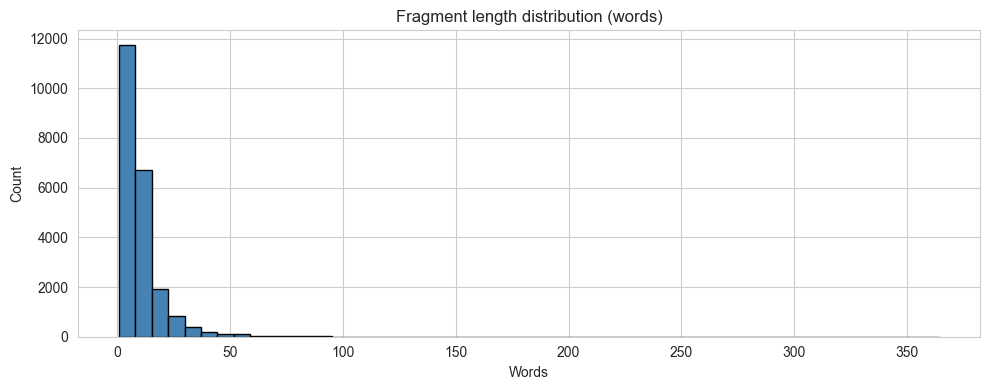

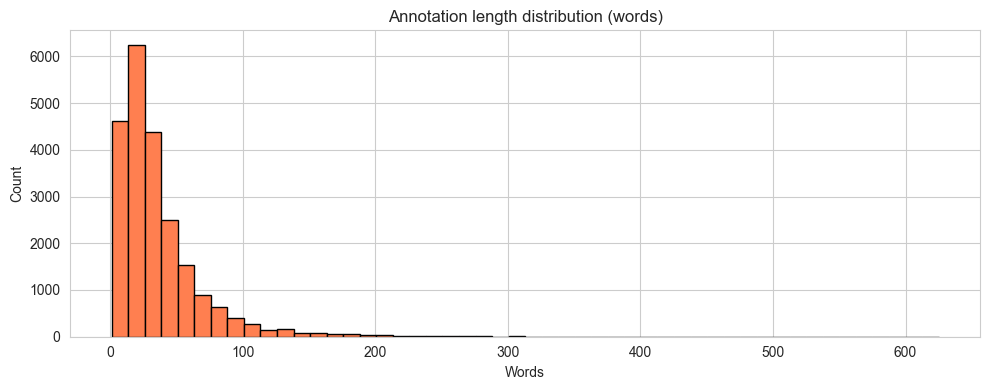


Votes stats:
count    22220.000000
mean        11.954140
std         21.499805
min          0.000000
25%          2.000000
50%          6.000000
75%         15.000000
max        652.000000
Name: votes, dtype: float64


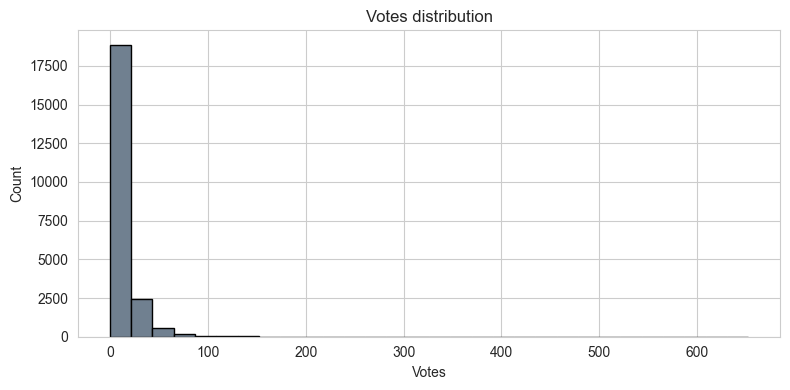


Top-10 artists by annotation count:
artist
Oxxxymiron                  1723
PHARAOH                     1241
Слава КПСС (Slava KPSS)      745
pyrokinesis                  695
ЛСП (LSP)                    597
Скриптонит (Skryptonite)     543
Versus Battle                526
Boulevard Depo               465
Loqiemean                    445
OBLADAET                     436
dtype: int64

Top-5 annotations by votes:
        artist                            title                                                                                                                                           fragment  votes
    Oxxxymiron Африканские бусы (African Beads)                                                                                                                     Все школьники штудируют Genius    652
Kendrick Lamar                      Not Like Us                                                                                                                          (Mustard on

In [31]:
from pathlib import Path
import json

ann_path = Path('..') / 'data' / 'annotations_dataset_full.json'
if not ann_path.exists():
    ann_path = Path('..') / 'data' / 'annotations_dataset_new.json'

if ann_path.exists():
    with open(ann_path, 'r', encoding='utf-8') as f:
        ann_data = json.load(f)

    total_songs = len(ann_data)
    total_anns = sum(len(s.get('annotations', [])) for s in ann_data)
    print('Annotations dataset:', ann_path)
    print('Songs:', total_songs)
    print('Annotations:', total_anns)
    print('Avg annotations per song:', round(total_anns / total_songs, 2) if total_songs else 0)

    rows = []
    for song in ann_data:
        artist = song.get('artist', '')
        title = song.get('title', '')
        for ann in song.get('annotations', []):
            rows.append({
                'artist': artist,
                'title': title,
                'fragment': ann.get('fragment', ''),
                'annotation': ann.get('annotation', ''),
                'votes': ann.get('votes', 0),
            })

    ann_df = pd.DataFrame(rows)
    ann_df['fragment_words'] = ann_df['fragment'].fillna('').str.split().str.len()
    ann_df['annotation_words'] = ann_df['annotation'].fillna('').str.split().str.len()

    print('\nFragment length (words):')
    print(ann_df['fragment_words'].describe())
    print('\nAnnotation length (words):')
    print(ann_df['annotation_words'].describe())

    plt.figure(figsize=(10, 4))
    plt.hist(ann_df['fragment_words'], bins=50, color='steelblue', edgecolor='black')
    plt.title('Fragment length distribution (words)')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.hist(ann_df['annotation_words'], bins=50, color='coral', edgecolor='black')
    plt.title('Annotation length distribution (words)')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    if 'votes' in ann_df.columns:
        print('\nVotes stats:')
        print(ann_df['votes'].describe())
        plt.figure(figsize=(8, 4))
        ann_df['votes'].plot(kind='hist', bins=30, color='slategray', edgecolor='black')
        plt.title('Votes distribution')
        plt.xlabel('Votes')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

    top_artists = ann_df.groupby('artist').size().sort_values(ascending=False).head(10)
    print('\nTop-10 artists by annotation count:')
    print(top_artists)

    top_votes = ann_df.sort_values('votes', ascending=False).head(5)
    print('\nTop-5 annotations by votes:')
    print(top_votes[['artist', 'title', 'fragment', 'votes']].to_string(index=False))
else:
    print('Annotations dataset not found:', ann_path)


In [ ]:
if ann_path.exists():
    print('='*70)
    print('РЕКОМЕНДАЦИИ ПО ОЧИСТКЕ ДАННЫХ')
    print('='*70)

    # 1. Дубликаты
    unique_before = len(ann_df)
    ann_df_clean = ann_df.drop_duplicates(subset=['fragment', 'annotation'])
    unique_after = len(ann_df_clean)
    removed_dups = unique_before - unique_after

    print(f'\n1⃣ Удаление дубликатов:')
    print(f'   Было: {unique_before:,} аннотаций')
    print(f'   Стало: {unique_after:,} аннотаций')
    print(f'   Удалено: {removed_dups:,} ({removed_dups/unique_before*100:.1f}%)')

    # 2. Пустые фрагменты/аннотации
    empty_fragments = (ann_df_clean['fragment'].str.strip() == '').sum()
    empty_annotations = (ann_df_clean['annotation'].str.strip() == '').sum()

    print(f'\n2⃣ Пустые значения:')
    print(f'   Пустых фрагментов: {empty_fragments}')
    print(f'   Пустых аннотаций: {empty_annotations}')

    ann_df_clean = ann_df_clean[
        (ann_df_clean['fragment'].str.strip() != '') &
        (ann_df_clean['annotation'].str.strip() != '')
    ]

    # 3. Слишком короткие
    min_words = 3
    too_short = (ann_df_clean['fragment_words'] < min_words).sum()

    print(f'\n3⃣ Короткие фрагменты (< {min_words} слов):')
    print(f'   Количество: {too_short} ({too_short/len(ann_df_clean)*100:.1f}%)')

    # 4. Слишком длинные выбросы
    q99_fragment = ann_df_clean['fragment_words'].quantile(0.99)
    q99_annotation = ann_df_clean['annotation_words'].quantile(0.99)

    outliers_fragment = (ann_df_clean['fragment_words'] > q99_fragment).sum()
    outliers_annotation = (ann_df_clean['annotation_words'] > q99_annotation).sum()

    print(f'\n4⃣ Выбросы (> 99 перцентиль):')
    print(f'   Фрагменты > {q99_fragment:.0f} слов: {outliers_fragment}')
    print(f'   Аннотации > {q99_annotation:.0f} слов: {outliers_annotation}')

    # Итоговая рекомендация
    print(f'\n' + '='*70)
    print(' ИТОГОВАЯ РЕКОМЕНДАЦИЯ:')
    print('='*70)
    print(f' Исходный датасет: {unique_before:,} аннотаций')
    print(f' После очистки: {len(ann_df_clean):,} аннотаций')
    print(f' Сохранено: {len(ann_df_clean)/unique_before*100:.1f}%')
    print(f'\nРекомендуется:')
    print(f'  1. Удалить дубликаты: -{removed_dups:,}')
    print(f'  2. Удалить пустые: -{empty_fragments + empty_annotations}')
    print(f'  3. Опционально: фильтровать короткие (< {min_words} слов)')
    print(f'  4. Опционально: обрезать выбросы (> 99 перцентиль)')

    # Сохранить очищенный датасет
    print(f'\n Для сохранения очищенного датасета используйте:')
    print(f'   cleaned_data = ann_df_clean.to_dict("records")')
    print(f'   # Затем сгруппировать обратно по песням и сохранить в JSON')

РЕКОМЕНДАЦИИ ПО ОЧИСТКЕ ДАННЫХ

1⃣ Удаление дубликатов:
   Было: 22,220 аннотаций
   Стало: 21,751 аннотаций
   Удалено: 469 (2.1%)

2⃣ Пустые значения:
   Пустых фрагментов: 0
   Пустых аннотаций: 0

3⃣ Короткие фрагменты (< 3 слов):
   Количество: 1803 (8.3%)

4⃣ Выбросы (> 99 перцентиль):
   Фрагменты > 54 слов: 211
   Аннотации > 178 слов: 216

 ИТОГОВАЯ РЕКОМЕНДАЦИЯ:
 Исходный датасет: 22,220 аннотаций
 После очистки: 21,751 аннотаций
 Сохранено: 97.9%

Рекомендуется:
  1. Удалить дубликаты: -469
  2. Удалить пустые: -0
  3. Опционально: фильтровать короткие (< 3 слов)
  4. Опционально: обрезать выбросы (> 99 перцентиль)

 Для сохранения очищенного датасета используйте:
   cleaned_data = ann_df_clean.to_dict("records")
   # Затем сгруппировать обратно по песням и сохранить в JSON


## 19. Рекомендации по очистке данных


КОРРЕЛЯЦИОННЫЙ АНАЛИЗ

 Корреляционная матрица:
                  fragment_words  annotation_words     votes
fragment_words          1.000000          0.214629  0.139770
annotation_words        0.214629          1.000000  0.367105
votes                   0.139770          0.367105  1.000000


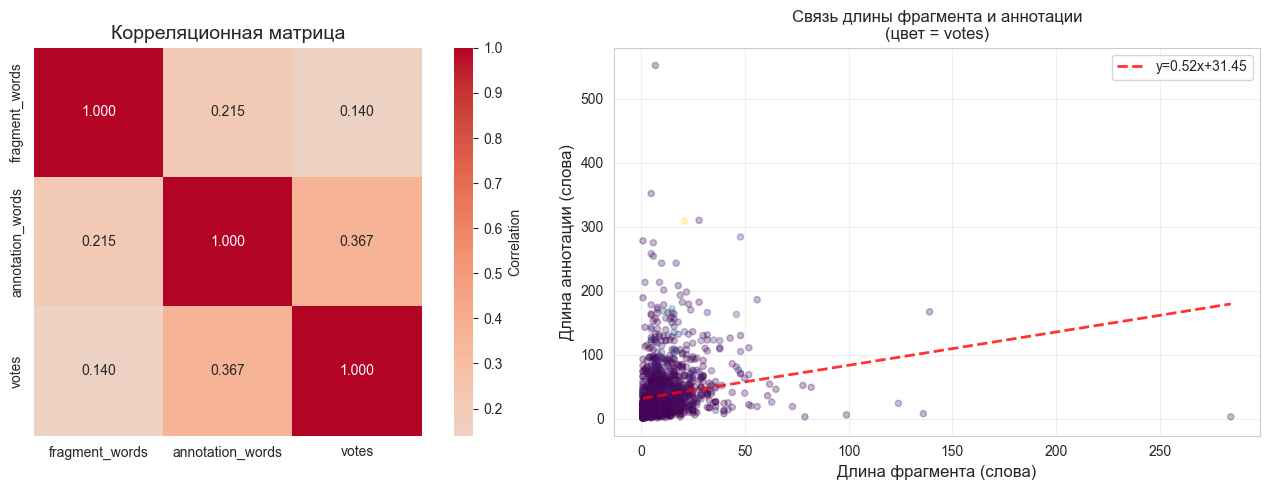


 Корреляция между длиной фрагмента и аннотации: 0.215
    Слабая корреляция - связь не очевидна


In [ ]:
if ann_path.exists():
    print('='*70)
    print('КОРРЕЛЯЦИОННЫЙ АНАЛИЗ')
    print('='*70)

    # Корреляция
    corr = ann_df[['fragment_words', 'annotation_words', 'votes']].corr()
    print('\n Корреляционная матрица:')
    print(corr)

    # Визуализация корреляции
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Heatmap
    ax1 = axes[0]
    sns.heatmap(corr, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                square=True, ax=ax1, cbar_kws={'label': 'Correlation'})
    ax1.set_title('Корреляционная матрица', fontsize=14)

    # Scatter: fragment vs annotation length
    ax2 = axes[1]
    sample = ann_df.sample(n=min(2000, len(ann_df)), random_state=42)
    ax2.scatter(sample['fragment_words'], sample['annotation_words'],
                alpha=0.3, s=20, c=sample['votes'], cmap='viridis')
    ax2.set_xlabel('Длина фрагмента (слова)', fontsize=12)
    ax2.set_ylabel('Длина аннотации (слова)', fontsize=12)
    ax2.set_title('Связь длины фрагмента и аннотации\n(цвет = votes)', fontsize=12)
    ax2.grid(alpha=0.3)

    # Добавим линию тренда
    z = np.polyfit(sample['fragment_words'], sample['annotation_words'], 1)
    p = np.poly1d(z)
    ax2.plot(sample['fragment_words'].sort_values(),
             p(sample['fragment_words'].sort_values()),
             "r--", alpha=0.8, linewidth=2, label=f'y={z[0]:.2f}x+{z[1]:.2f}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Статистические выводы
    corr_val = ann_df['fragment_words'].corr(ann_df['annotation_words'])
    print(f'\n Корреляция между длиной фрагмента и аннотации: {corr_val:.3f}')

    if corr_val > 0.3:
        print('    Умеренная положительная корреляция - длинные фрагменты имеют более длинные аннотации')
    elif corr_val > 0.1:
        print('    Слабая корреляция - связь не очевидна')
    else:
        print('    Корреляция отсутствует')

## 18. Корреляция длины фрагмента и аннотации


АНАЛИЗ ПО АРТИСТАМ

 Топ-20 артистов по количеству аннотаций:
                                Annotations  Total_Votes  Avg_Votes  Avg_Fragment_Words  Avg_Annotation_Words
artist                                                                                                       
Oxxxymiron                             1723        40597      23.56               10.83                 55.39
PHARAOH                                1241        19352      15.59               11.43                 30.83
Слава КПСС (Slava KPSS)                 745         6113       8.21                9.85                 38.35
pyrokinesis                             695         7273      10.46               12.48                 42.86
ЛСП (LSP)                               597         6444      10.79               12.94                 33.41
Скриптонит (Skryptonite)                543         6819      12.56               11.94                 34.44
Versus Battle                           526         1543  

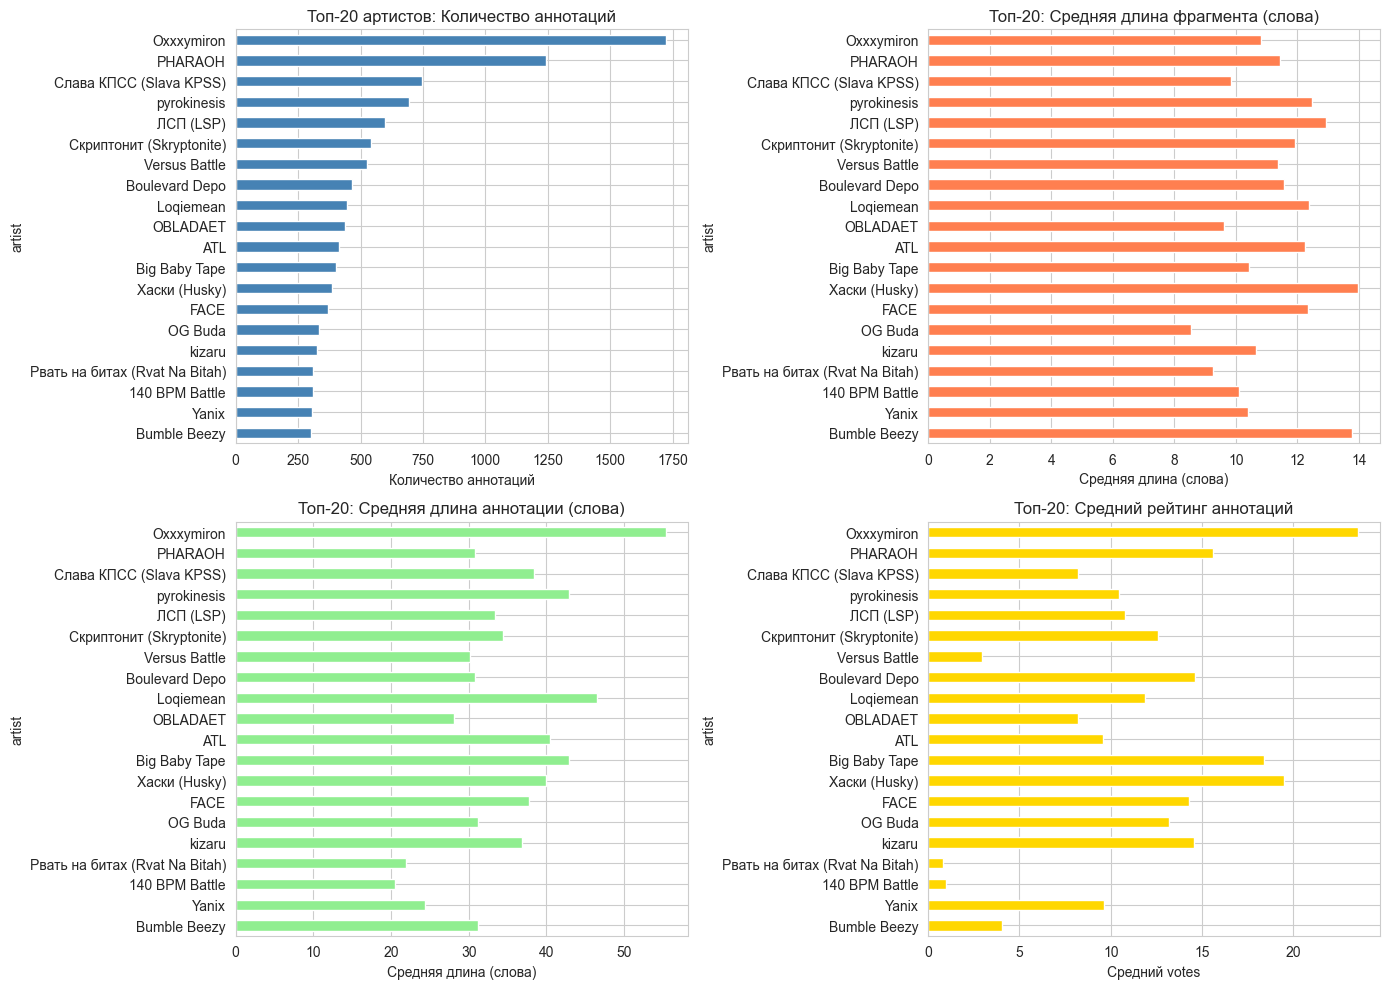


 Уникальных артистов: 507
 Уникальных песен: 3262


In [ ]:
if ann_path.exists():
    print('='*70)
    print('АНАЛИЗ ПО АРТИСТАМ')
    print('='*70)

    # Статистика по артистам
    artist_stats = ann_df.groupby('artist').agg({
        'fragment': 'count',
        'votes': ['sum', 'mean'],
        'fragment_words': 'mean',
        'annotation_words': 'mean'
    }).round(2)

    artist_stats.columns = ['Annotations', 'Total_Votes', 'Avg_Votes', 'Avg_Fragment_Words', 'Avg_Annotation_Words']
    artist_stats = artist_stats.sort_values('Annotations', ascending=False)

    print(f'\n Топ-20 артистов по количеству аннотаций:')
    print(artist_stats.head(20).to_string())

    # Топ по аннотациям
    top20_artists = artist_stats.head(20)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Количество аннотаций
    ax1 = axes[0, 0]
    top20_artists['Annotations'].plot(kind='barh', ax=ax1, color='steelblue')
    ax1.set_title('Топ-20 артистов: Количество аннотаций', fontsize=12)
    ax1.set_xlabel('Количество аннотаций')
    ax1.invert_yaxis()

    # 2. Средняя длина фрагмента
    ax2 = axes[0, 1]
    top20_artists['Avg_Fragment_Words'].plot(kind='barh', ax=ax2, color='coral')
    ax2.set_title('Топ-20: Средняя длина фрагмента (слова)', fontsize=12)
    ax2.set_xlabel('Средняя длина (слова)')
    ax2.invert_yaxis()

    # 3. Средняя длина аннотации
    ax3 = axes[1, 0]
    top20_artists['Avg_Annotation_Words'].plot(kind='barh', ax=ax3, color='lightgreen')
    ax3.set_title('Топ-20: Средняя длина аннотации (слова)', fontsize=12)
    ax3.set_xlabel('Средняя длина (слова)')
    ax3.invert_yaxis()

    # 4. Средний рейтинг (votes)
    ax4 = axes[1, 1]
    top20_artists['Avg_Votes'].plot(kind='barh', ax=ax4, color='gold')
    ax4.set_title('Топ-20: Средний рейтинг аннотаций', fontsize=12)
    ax4.set_xlabel('Средний votes')
    ax4.invert_yaxis()

    plt.tight_layout()
    plt.show()

    # Уникальные артисты
    print(f'\n Уникальных артистов: {ann_df["artist"].nunique()}')
    print(f' Уникальных песен: {ann_df.groupby(["artist", "title"]).ngroups}')


## 17. Анализ по артистам - аннотации


АНАЛИЗ ДУБЛИКАТОВ

 Статистика дубликатов:
  Всего аннотаций: 22,220
  Уникальных пар (fragment+annotation): 21,751
  Дубликатов: 469 (2.1%)

 Топ-10 самых частых дубликатов:

1. Повторяется 10 раз
   Fragment: "Нашла коса на камень..."
   Annotation: "Поговорка об упорном нежелании уступить друг другу..."

2. Повторяется 9 раз
   Fragment: "идёт война на память лет..."
   Annotation: "Речь идёт о вооруженном конфликте в Приднестровье 1990 – 1992 годов...."

3. Повторяется 7 раз
   Fragment: "Команда магов — ва-банк..."
   Annotation: "Азамат, вероятно, говорит о том, что, меняя вектор своего творчества с весёлого ..."

4. Повторяется 6 раз
   Fragment: "Не урыл, а закопал..."
   Annotation: "Интернет мем, который обозначает что один человек сделал что-то лучше чем другой..."

5. Повторяется 6 раз
   Fragment: "Я собрал бы медали твои
 Нагрел и залил прямо в ямы глазниц, чтоб потухли огни..."
   Annotation: "Локи показывает, что считает прадеда дьяволом, из-за того, что он делал...."



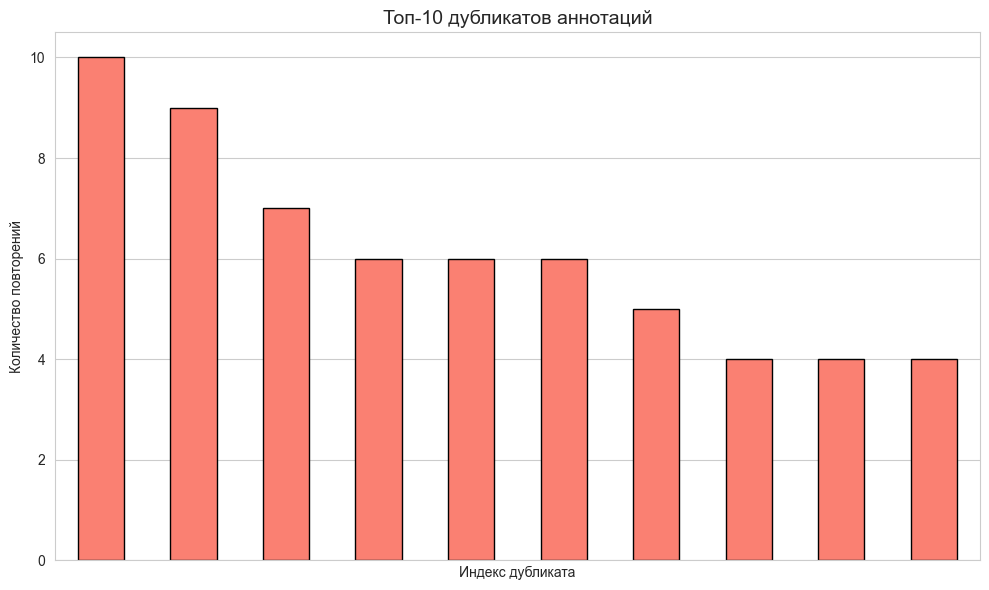


 Распределение дубликатов:
  Уникальных (1 копия): 21,390
  Дубликаты (2+ копий): 361


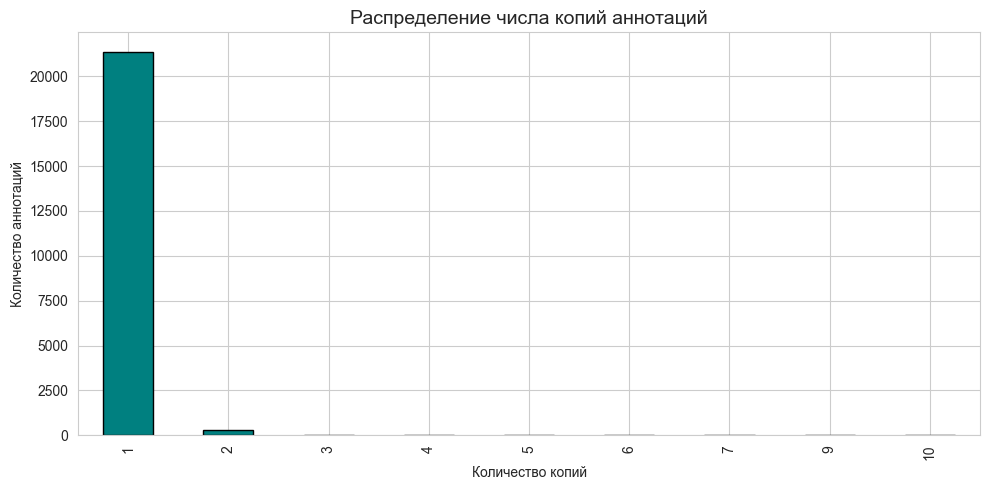

In [ ]:
if ann_path.exists():
    print('='*70)
    print('АНАЛИЗ ДУБЛИКАТОВ')
    print('='*70)

    # Проверяем дубликаты по fragment + annotation
    ann_df['pair_key'] = ann_df['fragment'] + '|||' + ann_df['annotation']

    duplicates = ann_df['pair_key'].duplicated().sum()
    unique_pairs = ann_df['pair_key'].nunique()

    print(f'\n Статистика дубликатов:')
    print(f'  Всего аннотаций: {len(ann_df):,}')
    print(f'  Уникальных пар (fragment+annotation): {unique_pairs:,}')
    print(f'  Дубликатов: {duplicates:,} ({duplicates/len(ann_df)*100:.1f}%)')

    # Топ дубликаты
    dup_counts = ann_df['pair_key'].value_counts()
    top_dups = dup_counts[dup_counts > 1].head(10)

    if len(top_dups) > 0:
        print(f'\n Топ-10 самых частых дубликатов:')
        for i, (key, count) in enumerate(top_dups.items(), 1):
            fragment, annotation = key.split('|||')
            print(f'\n{i}. Повторяется {count} раз')
            print(f'   Fragment: "{fragment[:80]}..."')
            print(f'   Annotation: "{annotation[:80]}..."')

        # Визуализация
        plt.figure(figsize=(10, 6))
        top_dups.plot(kind='bar', color='salmon', edgecolor='black')
        plt.title('Топ-10 дубликатов аннотаций', fontsize=14)
        plt.xlabel('Индекс дубликата')
        plt.ylabel('Количество повторений')
        plt.xticks([])
        plt.tight_layout()
        plt.show()

        # Распределение количества дубликатов
        dup_distribution = dup_counts.value_counts().sort_index()
        print(f'\n Распределение дубликатов:')
        print(f'  Уникальных (1 копия): {dup_distribution.get(1, 0):,}')
        print(f'  Дубликаты (2+ копий): {dup_distribution[dup_distribution.index > 1].sum():,}')

        plt.figure(figsize=(10, 5))
        dup_distribution[dup_distribution.index <= 20].plot(kind='bar', color='teal', edgecolor='black')
        plt.title('Распределение числа копий аннотаций', fontsize=14)
        plt.xlabel('Количество копий')
        plt.ylabel('Количество аннотаций')
        plt.tight_layout()
        plt.show()
